<a href="https://colab.research.google.com/github/songqsh/foo1/blob/master/src/linreg_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

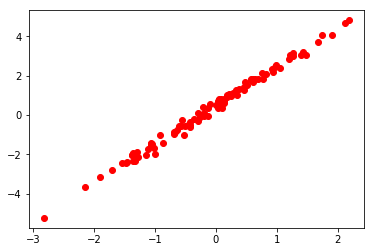

In [24]:
'''
Step 0: Creat data
'''

input_dim = 1
output_dim = 1

batch_size = 100

x_train = torch.randn(batch_size, input_dim)
noise = torch.randn(batch_size, input_dim)*0.2
y_train = 0.5 + 2*x_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'ro')

In [0]:
'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''

model = LinearRegressionModel(input_dim, output_dim)


In [0]:
'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [27]:

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################

    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    y_pred = model(x_train)
    
    # Calculate Loss
    loss = criterion(y_pred, y_train)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 3.0585718154907227
epoch 2, loss 2.9493319988250732
epoch 3, loss 2.8440346717834473
epoch 4, loss 2.742537498474121
epoch 5, loss 2.644702911376953
epoch 6, loss 2.550398826599121
epoch 7, loss 2.4594974517822266
epoch 8, loss 2.371875762939453
epoch 9, loss 2.2874152660369873
epoch 10, loss 2.2060017585754395
epoch 11, loss 2.1275250911712646
epoch 12, loss 2.051879405975342
epoch 13, loss 1.9789623022079468
epoch 14, loss 1.9086750745773315
epoch 15, loss 1.8409228324890137
epoch 16, loss 1.7756140232086182
epoch 17, loss 1.7126601934432983
epoch 18, loss 1.6519768238067627
epoch 19, loss 1.593481421470642
epoch 20, loss 1.5370949506759644
epoch 21, loss 1.4827417135238647
epoch 22, loss 1.4303478002548218
epoch 23, loss 1.3798428773880005
epoch 24, loss 1.3311585187911987
epoch 25, loss 1.284229040145874
epoch 26, loss 1.238991141319275
epoch 27, loss 1.1953835487365723
epoch 28, loss 1.1533478498458862
epoch 29, loss 1.112826943397522
epoch 30, loss 1.073766231536865

In [0]:
y_pred = model(x_train)

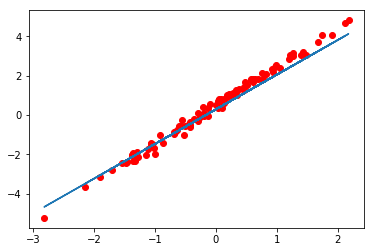

In [29]:
plt.plot(x_train.numpy(), y_train.numpy(), 'ro')
plt.plot(x_train.detach().numpy(), y_pred.detach().numpy())